In [1]:
#Load the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

Load the Diabetes Dataset

In [2]:
#Load the datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only the BMI feature (index 2)
diabetes_X = diabetes_X[:, np.newaxis, 2]

print("Shape of diabetes_X:", diabetes_X.shape)
print("Shape of diabetes_y:", diabetes_y.shape)

Shape of diabetes_X: (442, 1)
Shape of diabetes_y: (442,)


Plot the Data

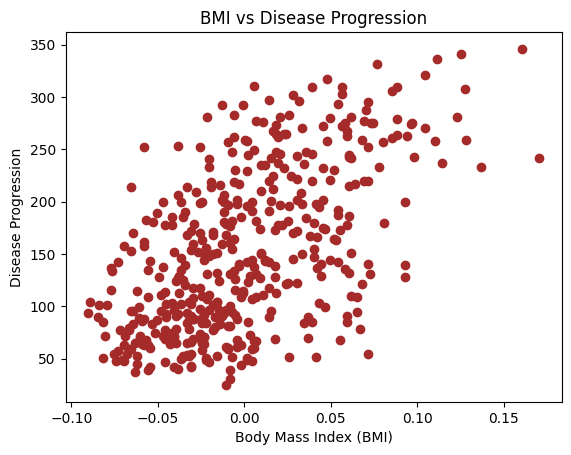

In [4]:
# Plot the data
plt.scatter(diabetes_X, diabetes_y, color='brown')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title('BMI vs Disease Progression')
plt.show()

Split the Data into Training and Testing Sets

In [5]:
# Split the data into training/testing sets
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X, diabetes_y, test_size=0.2, random_state=42)
# Print the shapes of the train and test sets\n",
print(f"Shape of diabetes_X_train: {diabetes_X_train.shape}")
print(f"Shape of diabetes_X_test: {diabetes_X_test.shape}")
print(f"Shape of diabetes_y_train: {diabetes_y_train.shape}")
print(f"Shape of diabetes_y_test: {diabetes_y_test.shape}")
   

Shape of diabetes_X_train: (353, 1)
Shape of diabetes_X_test: (89, 1)
Shape of diabetes_y_train: (353,)
Shape of diabetes_y_test: (89,)


Train the Linear Regression Model

In [6]:
# Create linear regression object
regression_model = LinearRegression()

# Train the model using the training sets
regression_model.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print("slope:", regression_model.coef_)
print("Intercept:", regression_model.intercept_)

slope: [998.57768914]
Intercept: 152.00335421448167


Make Predictions on the Testing Set

In [7]:
# Make predictions using the testing set
diabetes_y_test_pred = regression_model.predict(diabetes_X_test)

# Print the predicted values
print("Predicted values for the testing dataset:")
print(diabetes_y_test_pred)

Predicted values for the testing dataset:
[145.80622687 188.85739048 147.95878505 203.92529774 131.8145987
 127.50948234 322.31599764 197.4676232   61.85645785 167.33180868
 118.89924962  94.14483055  90.91599328 166.25552959  96.29738873
 157.64529687 223.29832136 240.5187868  180.24715776 210.38297228
 191.00994866 109.21273781 102.75506327 174.86576231 196.39134411
 166.25552959 211.45925137 133.96715688  78.0006442  130.73831961
 244.82390316 114.59413326 166.25552959 145.80622687 192.08622775
 229.7559959  121.0518078  118.89924962 121.0518078   94.14483055
  82.30576056 122.12808689 129.66204052 118.89924962 107.06017963
 116.74669144 115.67041235 101.67878418  67.2378533  153.34018051
 210.38297228  82.30576056 169.48436686 111.36529599 133.96715688
 216.84064682 105.98390054 213.61180955 133.96715688  97.37366782
 182.39971594 193.16250684 206.07785592 107.06017963  86.61087692
 170.56064595 140.42483142 127.50948234 117.82297053 139.34855233
 133.96715688 182.39971594 130.7383

Evaluate the Model on the Testing Set - MSE & MAE 

In [8]:
# The mean squared error and the mean Absolute error for testing dataset

mse_test = mean_squared_error(diabetes_y_test, diabetes_y_test_pred)
mae_test = mean_absolute_error(diabetes_y_test, diabetes_y_test_pred)

#Print the calculated MSE and MAE for the trained dataset
print("Mean squared error(testing):", mse_test)
print("Mean squared error(testing):", mae_test)

Mean squared error(testing): 4061.8259284949268
Mean squared error(testing): 52.25997644534553


Make Predictions on the Training Set - MSE & MAE

In [9]:
# Predictions on the training set
diabetes_y_train_pred = regression_model.predict(diabetes_X_train)

# Print the predicted values
print("Predicted values for the testing dataset:")
print(diabetes_y_train_pred)

Predicted values for the testing dataset:
[164.10297141 133.96715688 201.77273956 116.74669144  86.61087692
 112.44157508 172.71320413 221.14576318 189.93366957 135.04343597
  83.38203965 171.63692504  94.14483055 256.66297315  72.61924875
 172.71320413 111.36529599 116.74669144 108.13645872 171.63692504
 178.09459958 115.67041235 194.23878593 101.67878418 207.15413501
 166.25552959 140.42483142 141.50111051 142.5773896  147.95878505
 167.33180868 175.9420414  114.59413326 119.97552871 170.56064595
 136.11971506 145.80622687 160.87413414 114.59413326 142.5773896
  74.77180693 150.11134323 107.06017963 197.4676232  184.55227412
 237.28994953 141.50111051 262.0443686  145.80622687 153.34018051
 266.34948496 111.36529599 169.48436686 211.45925137 105.98390054
 199.62018138 157.64529687 121.0518078  206.07785592 146.88250596
 142.5773896  177.01832049 280.34111313 166.25552959 151.18762232
 121.0518078  156.56901778 161.95041323 121.0518078  113.51785417
 154.4164596  126.43320325  85.5345

Evaluate the Model on the Training Set

In [10]:
# Calculate MSE and MAE for the trained dataset
mse_train = mean_squared_error(diabetes_y_train, diabetes_y_train_pred)
mae_train = np.mean(np.abs(diabetes_y_train - diabetes_y_train_pred))

# Print the calculated MSE and MAE for the trained dataset
print("Mean squared error (training):", mse_train)
print("Mean absolute error (training):", mae_train)

Mean squared error (training): 3854.11265207582
Mean absolute error (training): 51.37972765404719


Calculate the Variance Score (R^2)

In [11]:
# Calculate the variance score (R^2) for the testing dataset
r2 = r2_score(diabetes_y_test, diabetes_y_test_pred)
print("Variance score (R^2) for testing dataset:", r2)

# Calculate the variance score (R^2) for the training dataset
r2_train = r2_score(diabetes_y_train, diabetes_y_train_pred)
print("Variance score (R^2) for training dataset:", r2_train)

Variance score (R^2) for testing dataset: 0.23335039815872138
Variance score (R^2) for training dataset: 0.3657241273794126


Plot the Outputs

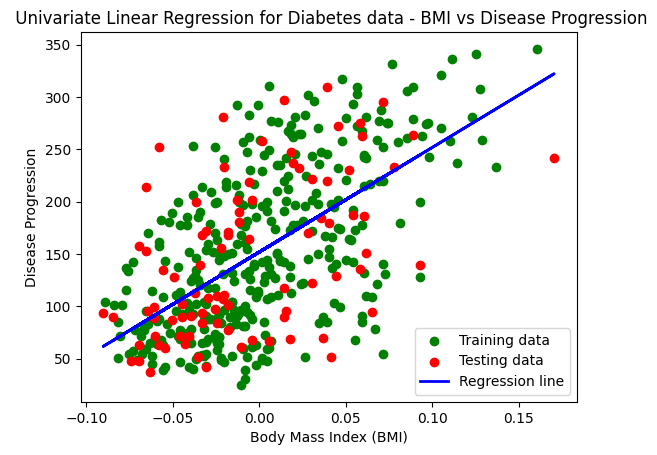

In [12]:
# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color='green', label='Training data')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', label='Testing data')
plt.plot(diabetes_X_test, diabetes_y_test_pred, color='blue', linewidth=2, label='Regression line')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title(' Univariate Linear Regression for Diabetes data - BMI vs Disease Progression')
plt.legend()
plt.show()